# FIFA 2022 WC Winner Prediction

I've been really excited for this WC for a long time as this will be last WC of so many legends like Cristiano, Messi, Neymar, Thiago etc. This project is something I'm really proud of as it's got elements of something I love to watch (football). Really enjoyed the time I invested in learning and researching and implementing those in this project.
It consist 2 datasets International football results from 1872 to 2022(Kaggle) and FIFA World Ranking 1992-2022(Kaggle).



## Data Preparation

In [233]:
import numpy as np
import pandas as pd
import re
import warnings 
warnings.filterwarnings("ignore") 



In [234]:
df = pd.read_csv("E:\\kaggle\\Project\\FIFA WC 2022 Winner Prediction\\results.csv")
df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [235]:
df["date"] = pd.to_datetime(df["date"])

In [236]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [237]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

Taking data only from last worldcup 2018 to friendles before WC 2022 starts.


In [238]:
df = df[df["date"].between('2018-1-1','2022-11-11',inclusive='neither')]
df.tail()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
44339,2022-09-12,Croatia,Brazil,1,1,FIFA World Cup,Al Rayyan,Qatar,True
44340,2022-09-12,Netherlands,Argentina,2,2,FIFA World Cup,Lusail,Qatar,True
44341,2022-09-12,Malaysia,Cambodia,4,0,Friendly,Kuala Lumpur,Malaysia,False
44342,2022-10-12,Morocco,Portugal,1,0,FIFA World Cup,Doha,Qatar,True
44343,2022-10-12,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True


In [239]:
df_rank = pd.read_csv('E:\\kaggle\\Project\\FIFA WC 2022 Winner Prediction\\fifa_ranking-2022-12-22.csv')
df_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,74,Madagascar,MAD,18.0,0.0,0,CAF,1992-12-31
1,52,Qatar,QAT,27.0,0.0,0,AFC,1992-12-31
2,51,Senegal,SEN,27.0,0.0,0,CAF,1992-12-31
3,50,El Salvador,SLV,28.0,0.0,0,CONCACAF,1992-12-31
4,49,Korea Republic,KOR,28.0,0.0,0,AFC,1992-12-31


In [240]:
df_rank["rank_date"] = pd.to_datetime(df_rank["rank_date"])
df_rank = df_rank[df_rank['rank_date'].between('2018-1-1','2022-11-11',inclusive='neither')]
df_rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
55320,131,Latvia,LVA,233.0,233.0,-1,UEFA,2018-01-18
55321,132,Swaziland,SWZ,228.0,225.0,-1,CAF,2018-01-18
55322,133,Liberia,LBR,224.0,224.0,-1,CAF,2018-01-18
55323,134,Chinese Taipei,TPE,223.0,223.0,-1,AFC,2018-01-18
55324,135,Kazakhstan,KAZ,220.0,220.0,-2,UEFA,2018-01-18


Some names are different in both datasets so changing the names on the ranking dataset

In [241]:
df_rank["country_full"] = df_rank["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

Will be using merge() to join dataset to make a dataset of Fifa games and ranking. 
Merge is used as join in SQL but before that will just group by the country name in the ranking dataset so we know when the changes in rank was made or so forth

In [242]:
df_rank = df_rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
df_rank.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2018-01-18,148.0,Afghanistan,AFG,176.0,181.0,0.0,AFC
1,2018-01-19,148.0,Afghanistan,AFG,176.0,181.0,0.0,AFC
2,2018-01-20,148.0,Afghanistan,AFG,176.0,181.0,0.0,AFC
3,2018-01-21,148.0,Afghanistan,AFG,176.0,181.0,0.0,AFC
4,2018-01-22,148.0,Afghanistan,AFG,176.0,181.0,0.0,AFC


In [243]:
df_wc_ranked = df.merge(df_rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)
df_wc_ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points,previous_points,rank,rank_change
0,2018-02-01,Iraq,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,410.0,438.0,82.0,3.0
1,2018-02-01,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,335.0,351.0,101.0,0.0
2,2018-05-01,Oman,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,383.0,331.0,87.0,-16.0
3,2018-07-01,Estonia,Sweden,1,1,Friendly,Abu Dhabi,United Arab Emirates,True,1497.0,1499.0,92.0,0.0
4,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,1584.0,1581.0,10.0,0.0


Now as we get the merged dataset, we'll merget the dataset with ranking dataset again to have home & away columns for required fields

In [244]:
df_wc_ranked = df_wc_ranked.merge(df_rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)
df_wc_ranked.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-02-01,Iraq,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,410.0,438.0,82.0,3.0,436.0,476.0,78.0,5.0
1,2018-02-01,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,335.0,351.0,101.0,0.0,264.0,282.0,122.0,7.0
2,2018-05-01,Oman,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,383.0,331.0,87.0,-16.0,405.0,430.0,81.0,2.0
3,2018-07-01,Estonia,Sweden,1,1,Friendly,Abu Dhabi,United Arab Emirates,True,1497.0,1499.0,92.0,0.0,1955.0,1954.0,21.0,-1.0
4,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,1584.0,1581.0,10.0,0.0,1548.0,1550.0,17.0,2.0


Lets check for Portugal

In [245]:
df_wc_ranked[(df_wc_ranked.home_team == "Portugal") | (df_wc_ranked.away_team == "Portugal")].tail(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
2801,2021-12-10,Portugal,Luxembourg,5,0,FIFA World Cup qualification,Faro-Loulé,Portugal,False,1660.25,1681.73,8.0,0.0,1236.45,1234.13,93.0,-1.0
2860,2021-11-11,Republic of Ireland,Portugal,0,0,FIFA World Cup qualification,Dublin,Republic of Ireland,False,1430.59,1418.70,51.0,1.0,1681.73,1674.90,8.0,1.0
2916,2021-11-14,Portugal,Serbia,1,2,FIFA World Cup qualification,Lisbon,Portugal,False,1681.73,1674.90,8.0,1.0,1527.34,1515.97,25.0,-3.0
3154,2022-03-24,Portugal,Turkey,3,1,FIFA World Cup qualification,Porto,Portugal,False,1660.25,1660.25,8.0,0.0,1472.72,1472.72,39.0,2.0
3237,2022-03-29,Portugal,North Macedonia,2,0,FIFA World Cup qualification,Porto,Portugal,False,1660.25,1660.25,8.0,0.0,1367.23,1367.23,67.0,0.0
3312,2022-02-06,Spain,Portugal,1,1,UEFA Nations League,Sevilla,Spain,False,1704.75,1704.75,7.0,0.0,1660.25,1660.25,8.0,0.0
3366,2022-05-06,Portugal,Switzerland,4,0,UEFA Nations League,Lisbon,Portugal,False,1674.78,1660.25,8.0,0.0,1635.32,1642.83,14.0,0.0
3626,2022-09-27,Portugal,Spain,0,1,UEFA Nations League,Braga,Portugal,False,1678.65,1678.65,9.0,0.0,1716.93,1716.93,6.0,0.0
3648,2022-02-12,South Korea,Portugal,2,1,FIFA World Cup,Al Rayyan,Qatar,True,1522.85,1507.24,29.0,-4.0,1660.25,1660.25,8.0,0.0
3656,2022-06-12,Portugal,Switzerland,6,1,FIFA World Cup,Lusail,Qatar,True,1674.78,1660.25,8.0,0.0,1635.32,1642.83,14.0,0.0


Now, we have the data ready to create features based on the games' results and FIFA rankings.

# Feature Engineering

In [246]:
# For ease of understanding
df = df_wc_ranked
df.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-02-01,Iraq,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,410.0,438.0,82.0,3.0,436.0,476.0,78.0,5.0
1,2018-02-01,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,335.0,351.0,101.0,0.0,264.0,282.0,122.0,7.0


In [247]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = df.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

df[["result", "home_team_points", "away_team_points"]] = results

Let's see the coorelation between FIFA ranking & FIFA rank points

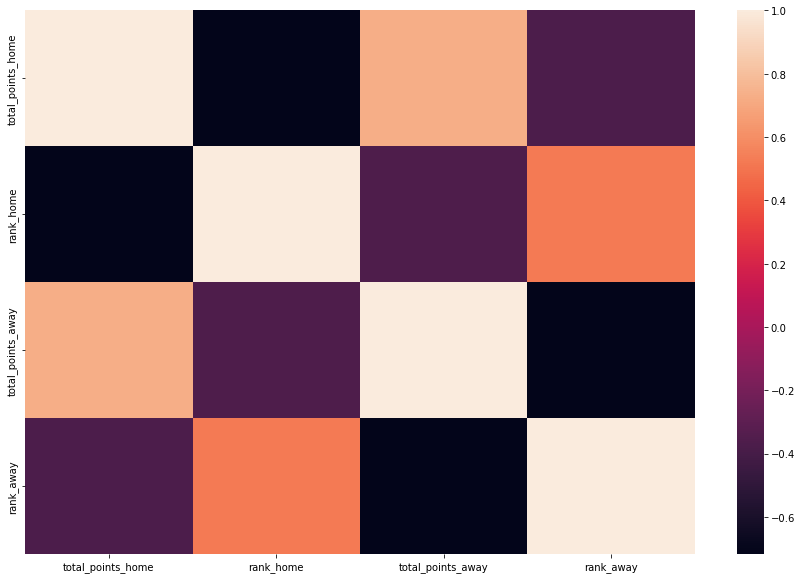

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
sns.heatmap(df[["total_points_home", "rank_home", "total_points_away", "rank_away"]].corr())
plt.show()

Okay, so the Fifa ranking points and Fifa ranking are negatively correlated, and we should use only one of them to make new features


In [249]:
df["rank_dif"] = df["rank_home"] - df["rank_away"]
df["sg"] = df["home_score"] - df["away_score"]
df["points_home_by_rank"] = df["home_team_points"]/df["rank_away"]
df["points_away_by_rank"] = df["away_team_points"]/df["rank_home"]

df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,...,previous_points_away,rank_away,rank_change_away,result,home_team_points,away_team_points,rank_dif,sg,points_home_by_rank,points_away_by_rank
0,2018-02-01,Iraq,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,410.0,...,476.0,78.0,5.0,2,1,1,4.0,0,0.012821,0.012195
1,2018-02-01,Oman,Bahrain,1,0,Gulf Cup,Kuwait City,Kuwait,True,335.0,...,282.0,122.0,7.0,0,3,0,-21.0,1,0.024590,0.000000
2,2018-05-01,Oman,United Arab Emirates,0,0,Gulf Cup,Kuwait City,Kuwait,True,383.0,...,430.0,81.0,2.0,2,1,1,6.0,0,0.012346,0.011494
3,2018-07-01,Estonia,Sweden,1,1,Friendly,Abu Dhabi,United Arab Emirates,True,1497.0,...,1954.0,21.0,-1.0,2,1,1,71.0,0,0.047619,0.010870
4,2018-11-01,Denmark,Sweden,0,1,Friendly,Abu Dhabi,United Arab Emirates,True,1584.0,...,1550.0,17.0,2.0,1,0,3,-7.0,-1,0.000000,0.300000
5,2018-11-01,Indonesia,Iceland,0,6,Friendly,Sleman,Indonesia,False,1004.0,...,1461.0,36.0,0.0,1,0,3,124.0,-6,0.000000,0.018750
6,2018-11-01,Jordan,Finland,1,2,Friendly,Abu Dhabi,United Arab Emirates,True,1189.0,...,1378.0,56.0,-2.0,1,0,3,56.0,-1,0.000000,0.026786
7,2018-01-18,Uganda,Namibia,0,1,African Nations Championship,Marrakech,Morocco,True,446.0,...,274.0,111.0,-7.0,1,0,3,-38.0,-1,0.000000,0.041096
8,2018-01-19,Libya,Nigeria,0,1,African Nations Championship,Tangier,Morocco,True,389.0,...,640.0,51.0,0.0,1,0,3,38.0,-1,0.000000,0.033708
9,2018-01-19,Rwanda,Equatorial Guinea,1,0,African Nations Championship,Tangier,Morocco,True,282.0,...,187.0,141.0,-5.0,0,3,0,-25.0,1,0.021277,0.000000


In order to create the features, I'll separate the dataset in home team's and away team's dataset, unify them and calculate the past game values. After that, I'll separate again and merge them, retrieving the original dataset. This proccess optimizes the creation of the features.

In [250]:
home_team = df[["date", "home_team", "home_score", "away_score", "rank_home", "rank_away","rank_change_home", "total_points_home", "result", "rank_dif", "points_home_by_rank", "home_team_points"]]

away_team = df[["date", "away_team", "away_score", "home_score", "rank_away", "rank_home","rank_change_away", "total_points_away", "result", "rank_dif", "points_away_by_rank", "away_team_points"]]

In [251]:
home_team.columns = [h.replace("home_", "").replace("_home", "").replace("away_", "suf_").replace("_away", "_suf") for h in home_team.columns]

away_team.columns = [a.replace("away_", "").replace("_away", "").replace("home_", "suf_").replace("_home", "_suf") for a in away_team.columns]

In [252]:
#home_team.head()
#away_team.head()

In [253]:
team_stats = home_team.append(away_team).sort_values("date")
team_stats.head(20)

,date,team,score,suf_score,rank,rank_suf,rank_change,total_points,result,rank_dif,points_by_rank,team_points
7,2018-01-18,Namibia,1,0,111.0,73.0,-7.0,300.0,1,-38.0,0.041096,3
7,2018-01-18,Uganda,0,1,73.0,111.0,-2.0,446.0,1,-38.0,0.000000,0
8,2018-01-19,Libya,0,1,89.0,51.0,1.0,389.0,1,38.0,0.000000,0
8,2018-01-19,Nigeria,1,0,51.0,89.0,0.0,651.0,1,38.0,0.033708,3
9,2018-01-19,Equatorial Guinea,0,1,141.0,116.0,-5.0,202.0,0,-25.0,0.000000,0
9,2018-01-19,Rwanda,1,0,116.0,141.0,3.0,282.0,0,-25.0,0.021277,3
10,2018-01-20,Cameroon,0,1,45.0,142.0,0.0,707.0,0,97.0,0.000000,0
11,2018-01-20,Congo,2,0,96.0,44.0,0.0,369.0,0,52.0,0.068182,3
10,2018-01-20,Angola,1,0,142.0,45.0,1.0,200.0,0,97.0,0.066667,3
11,2018-01-20,Burkina Faso,0,2,44.0,96.0,0.0,709.0,0,52.0,0.000000,0


In [254]:
#this column will be used to calculate features for simulation later
team_stats_raw = team_stats.copy()

In [255]:
stats_val = []

for index, row in team_stats.iterrows():
    team = row["team"]
    date = row["date"]
    past_games = team_stats.loc[(team_stats["team"] == team) & (team_stats["date"] < date)].sort_values(by=['date'], ascending=False)
    last5 = past_games.head(5)
    
    goals = past_games["score"].mean()
    goals_l5 = last5["score"].mean()
    
    goals_suf = past_games["suf_score"].mean()
    goals_suf_l5 = last5["suf_score"].mean()
    
    rank = past_games["rank_suf"].mean()
    rank_l5 = last5["rank_suf"].mean()
    
    if len(last5) > 0:
        points = past_games["total_points"].values[0] - past_games["total_points"].values[-1]
        points_l5 = last5["total_points"].values[0] - last5["total_points"].values[-1] 
    else:
        points = 0
        points_l5 = 0
        
    gp = past_games["team_points"].mean()
    gp_l5 = last5["team_points"].mean()
    
    gp_rank = past_games["points_by_rank"].mean()
    gp_rank_l5 = last5["points_by_rank"].mean()
    
    stats_val.append([goals, goals_l5, goals_suf, goals_suf_l5, rank, rank_l5, points, points_l5, gp, gp_l5, gp_rank, gp_rank_l5])

In [256]:
stats_cols = ["goals_mean", "goals_mean_l5", "goals_suf_mean", "goals_suf_mean_l5", "rank_mean", "rank_mean_l5", "points_mean", "points_mean_l5", "game_points_mean", "game_points_mean_l5", "game_points_rank_mean", "game_points_rank_mean_l5"]

stats_df = pd.DataFrame(stats_val, columns=stats_cols)

full_df = pd.concat([team_stats.reset_index(drop=True), stats_df], axis=1, ignore_index=False)

In [257]:
home_team_stats = full_df.iloc[:int(full_df.shape[0]/2),:]
away_team_stats = full_df.iloc[int(full_df.shape[0]/2):,:]

In [258]:
home_team_stats.columns[-12:] #new columns

Index(['goals_mean', 'goals_mean_l5', 'goals_suf_mean', 'goals_suf_mean_l5',
       'rank_mean', 'rank_mean_l5', 'points_mean', 'points_mean_l5',
       'game_points_mean', 'game_points_mean_l5', 'game_points_rank_mean',
       'game_points_rank_mean_l5'],
      dtype='object')

In [259]:
home_team_stats = home_team_stats[home_team_stats.columns[-12:]]
away_team_stats = away_team_stats[away_team_stats.columns[-12:]]

In [260]:
home_team_stats.columns = ['home_'+str(col) for col in home_team_stats.columns]
away_team_stats.columns = ['away_'+str(col) for col in away_team_stats.columns]

In [261]:
match_stats = pd.concat([home_team_stats, away_team_stats.reset_index(drop=True)], axis=1, ignore_index=False)

In [262]:
full_df = pd.concat([df, match_stats.reset_index(drop=True)], axis=1, ignore_index=False)
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

In [263]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

full_df["is_friendly"] = full_df["tournament"].apply(lambda x: find_friendly(x)) 
full_df = pd.get_dummies(full_df, columns=["is_friendly"])
full_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'total_points_home',
       'previous_points_home', 'rank_home', 'rank_change_home',
       'total_points_away', 'previous_points_away', 'rank_away',
       'rank_change_away', 'result', 'home_team_points', 'away_team_points',
       'rank_dif', 'sg', 'points_home_by_rank', 'points_away_by_rank',
       'home_goals_mean', 'home_goals_mean_l5', 'home_goals_suf_mean',
       'home_goals_suf_mean_l5', 'home_rank_mean', 'home_rank_mean_l5',
       'home_points_mean', 'home_points_mean_l5', 'home_game_points_mean',
       'home_game_points_mean_l5', 'home_game_points_rank_mean',
       'home_game_points_rank_mean_l5', 'away_goals_mean',
       'away_goals_mean_l5', 'away_goals_suf_mean', 'away_goals_suf_mean_l5',
       'away_rank_mean', 'away_rank_mean_l5', 'away_points_mean',
       'away_points_mean_l5', 'away_game_points_mean',
       'away_game_points_mean_l5', 'away_

Only selecting columns that'll help in features analysis

In [264]:
base_df = full_df[["date", "home_team", "away_team", "rank_home", "rank_away","home_score", "away_score","result", "rank_dif", "rank_change_home", "rank_change_away", 'home_goals_mean',
       'home_goals_mean_l5', 'home_goals_suf_mean', 'home_goals_suf_mean_l5',
       'home_rank_mean', 'home_rank_mean_l5', 'home_points_mean',
       'home_points_mean_l5', 'away_goals_mean', 'away_goals_mean_l5',
       'away_goals_suf_mean', 'away_goals_suf_mean_l5', 'away_rank_mean',
       'away_rank_mean_l5', 'away_points_mean', 'away_points_mean_l5','home_game_points_mean', 'home_game_points_mean_l5',
       'home_game_points_rank_mean', 'home_game_points_rank_mean_l5','away_game_points_mean',
       'away_game_points_mean_l5', 'away_game_points_rank_mean',
       'away_game_points_rank_mean_l5',
       'is_friendly_0', 'is_friendly_1']]

base_df.tail()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1
3655,2022-06-12,Morocco,Spain,24.0,7.0,0,0,2,17.0,0.0,...,1.368421,1.8,0.016014,0.030609,1.020833,2.0,0.010478,0.012524,1,0
3656,2022-06-12,Portugal,Switzerland,8.0,14.0,6,1,0,-6.0,0.0,...,2.000000,2.2,0.100283,0.111622,0.375000,0.0,0.002989,0.000000,1,0
3657,2022-09-12,Croatia,Brazil,15.0,1.0,1,1,2,14.0,0.0,...,0.636364,1.2,0.003434,0.006155,1.045455,2.0,0.046352,0.081028,1,0
3658,2022-09-12,Netherlands,Argentina,8.0,3.0,2,2,2,5.0,0.0,...,1.535714,0.2,0.173913,0.013333,1.527778,1.0,0.019788,0.012986,1,0
3659,2022-09-12,Malaysia,Cambodia,148.0,174.0,4,0,0,-26.0,1.0,...,2.185185,1.8,0.183284,0.111450,0.611111,0.4,0.003977,0.003802,0,1


In [265]:
base_df.isna().sum()  #Finding and treating null value

date                               0
home_team                          0
away_team                          0
rank_home                          0
rank_away                          0
home_score                         0
away_score                         0
result                             0
rank_dif                           0
rank_change_home                   0
rank_change_away                   0
home_goals_mean                  198
home_goals_mean_l5               198
home_goals_suf_mean              198
home_goals_suf_mean_l5           198
home_rank_mean                   198
home_rank_mean_l5                198
home_points_mean                   0
home_points_mean_l5                0
away_goals_mean                    3
away_goals_mean_l5                 3
away_goals_suf_mean                3
away_goals_suf_mean_l5             3
away_rank_mean                     3
away_rank_mean_l5                  3
away_points_mean                   0
away_points_mean_l5                0
h

In [266]:
#will remove all the null values as their mean cannot be determined
base_df_no_fg = base_df.dropna()

# Data Analysis

As we've the features now, I'll try to find the preditive features for our model. Also I might add more features if required.
To analyze the predictive power, I'll assign draw games as a lose of the home team and will create a binary problem.

In [267]:
df = base_df_no_fg

def no_draw(x):
    if x == 2:
        return 1
    else:
        return x
    
df["target"] = df["result"].apply(lambda x: no_draw(x))

In [268]:
df.head()

,date,home_team,away_team,rank_home,rank_away,home_score,away_score,result,rank_dif,rank_change_home,...,home_game_points_mean_l5,home_game_points_rank_mean,home_game_points_rank_mean_l5,away_game_points_mean,away_game_points_mean_l5,away_game_points_rank_mean,away_game_points_rank_mean_l5,is_friendly_0,is_friendly_1,target
15,2018-01-23,Equatorial Guinea,Nigeria,141.0,51.0,1,3,1,90.0,-5.0,...,3.0,0.041096,0.041096,1.958333,1.8,0.161535,0.033571,1,0,1
16,2018-01-23,Rwanda,Libya,116.0,89.0,0,1,1,27.0,3.0,...,3.0,0.033708,0.033708,1.193548,1.8,0.039676,0.033131,1,0,1
17,2018-01-24,Burkina Faso,Cameroon,44.0,45.0,1,1,2,-1.0,0.0,...,0.0,0.000000,0.000000,1.772727,0.2,0.026426,0.001143,1,0,1
18,2018-01-24,Congo,Angola,96.0,142.0,0,0,2,-46.0,0.0,...,0.0,0.000000,0.000000,1.692308,2.4,0.037787,0.038562,1,0,1
19,2018-01-27,Moldova,South Korea,166.0,59.0,0,1,1,107.0,-1.0,...,3.0,0.021277,0.021277,1.727273,1.6,0.019339,0.021489,0,1,1


In [269]:
data1 = df[list(df.columns[8:20].values) + ["target"]]
data2 = df[df.columns[20:]]

Analysis that will be made:

Violin and boxplot to analyze if the features have different distributions according to the target.


Scatter plots to analyze correlations

In [270]:
scaled = (data1[:-1] - data1[:-1].mean()) / data1[:-1].std()
scaled["target"] = data1["target"]
violin1 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

scaled = (data2[:-1] - data2[:-1].mean()) / data2[:-1].std()
scaled["target"] = data2["target"]
violin2 = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

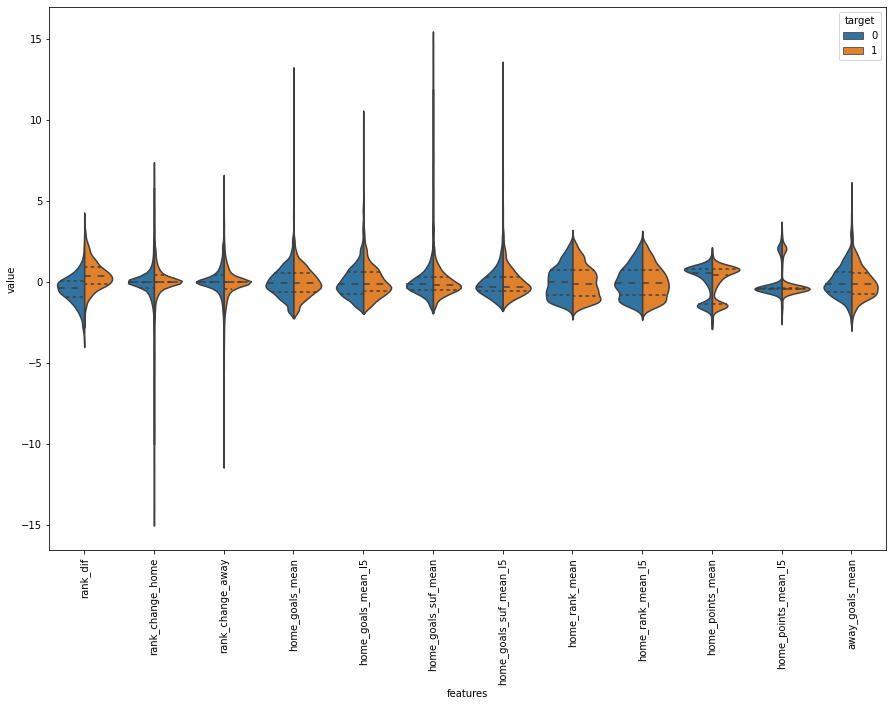

In [271]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin1,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

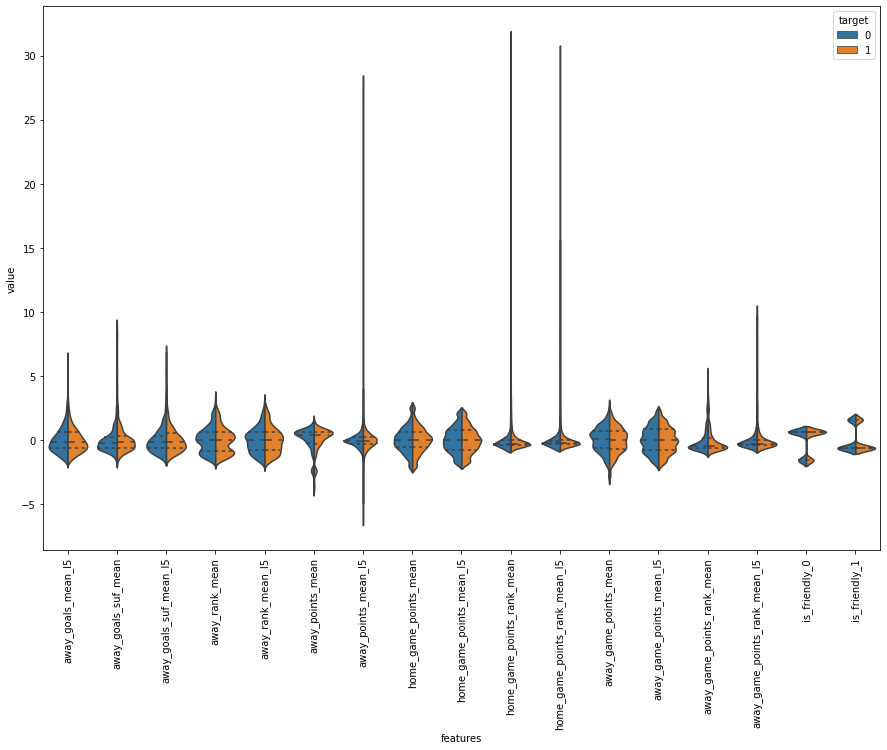

In [272]:
plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin2,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

With the plots, we find that rank difference is the only good separator of the data. But, we can create features that get the differences between home and away team and analyze if they are good separating the data.

In [273]:
dif = df.copy()
dif.loc[:, "goals_dif"] = dif["home_goals_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_mean_l5"]
dif.loc[:, "goals_suf_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_suf_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_made_suf_dif"] = dif["home_goals_mean"] - dif["away_goals_suf_mean"]
dif.loc[:, "goals_made_suf_dif_l5"] = dif["home_goals_mean_l5"] - dif["away_goals_suf_mean_l5"]
dif.loc[:, "goals_suf_made_dif"] = dif["home_goals_suf_mean"] - dif["away_goals_mean"]
dif.loc[:, "goals_suf_made_dif_l5"] = dif["home_goals_suf_mean_l5"] - dif["away_goals_mean_l5"]


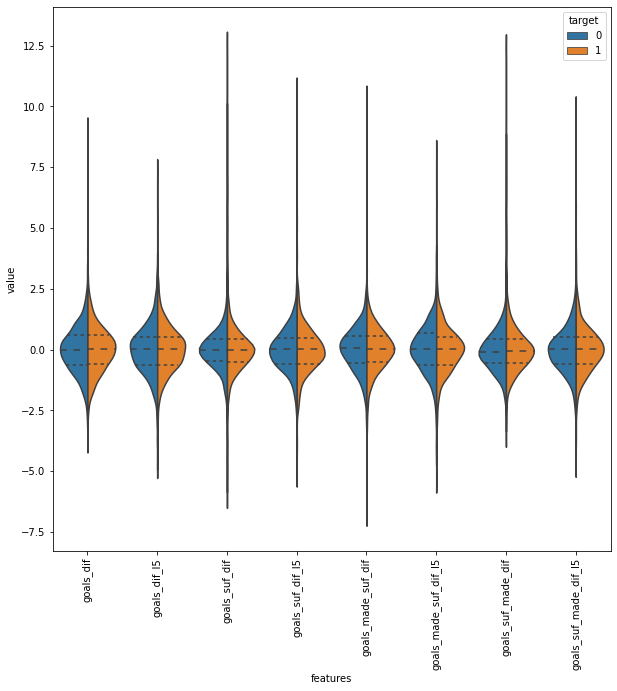

In [274]:
data_difs = dif.iloc[:, -8:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

With that plot, we see that goal differences are good separator, and goals suffered difference too. Differences between goals made and goals suffered of the teams are not very good separators.

Now, we have 5 features:

rank_dif,
goals_dif,
goals_dif_l5,
goals_suf_dif,
goals_suf_dif_l5

We can create other features, like differences of points made, differences of points made by rank faced and differences of rank faced.



In [275]:
dif.loc[:, "dif_points"] = dif["home_game_points_mean"] - dif["away_game_points_mean"]
dif.loc[:, "dif_points_l5"] = dif["home_game_points_mean_l5"] - dif["away_game_points_mean_l5"]
dif.loc[:, "dif_points_rank"] = dif["home_game_points_rank_mean"] - dif["away_game_points_rank_mean"]
dif.loc[:, "dif_points_rank_l5"] = dif["home_game_points_rank_mean_l5"] - dif["away_game_points_rank_mean_l5"]
dif.loc[:, "dif_rank_agst"] = dif["home_rank_mean"] - dif["away_rank_mean"]
dif.loc[:, "dif_rank_agst_l5"] = dif["home_rank_mean_l5"] - dif["away_rank_mean_l5"]

Also, we can calculate goals made and suffered by rank, and check this difference.

In [276]:
dif.loc[:, "goals_per_ranking_dif"] = (dif["home_goals_mean"] / dif["home_rank_mean"]) - (dif["away_goals_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif"] = (dif["home_goals_suf_mean"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_dif_l5"] = (dif["home_goals_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_mean_l5"] / dif["away_rank_mean"])
dif.loc[:, "goals_per_ranking_suf_dif_l5"] = (dif["home_goals_suf_mean_l5"] / dif["home_rank_mean"]) - (dif["away_goals_suf_mean_l5"] / dif["away_rank_mean"])

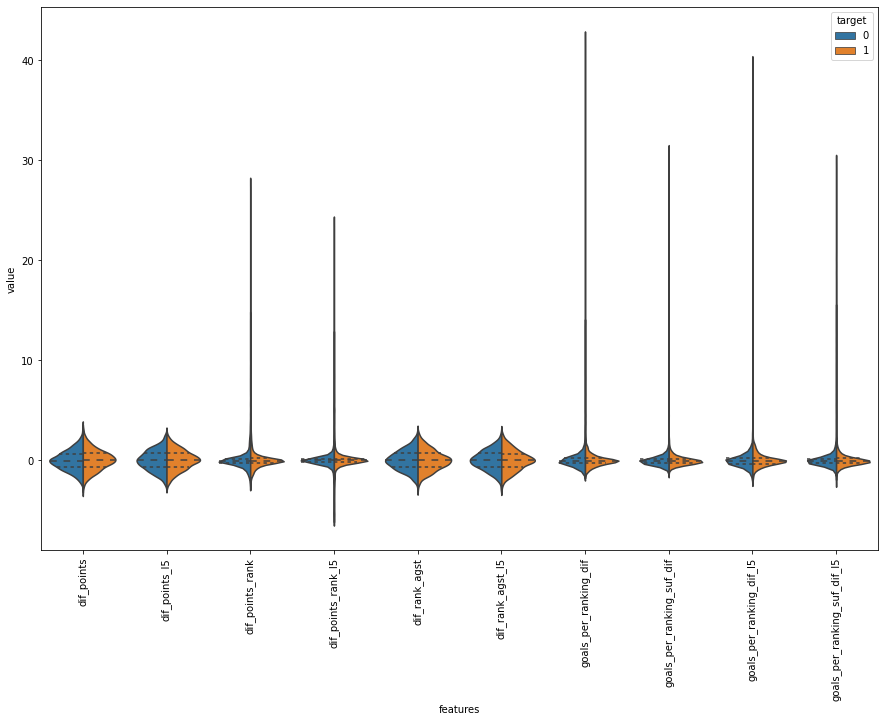

In [277]:
data_difs = dif.iloc[:, -10:]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["target"] = data2["target"]
violin = pd.melt(scaled,id_vars="target", var_name="features", value_name="value")

plt.figure(figsize=(15,10))
sns.violinplot(x="features", y="value", hue="target", data=violin,split=True, inner="quart")
plt.xticks(rotation=90)
plt.show()

Nah, I'll check Boxplot as the values are low as it'll be a better chart.

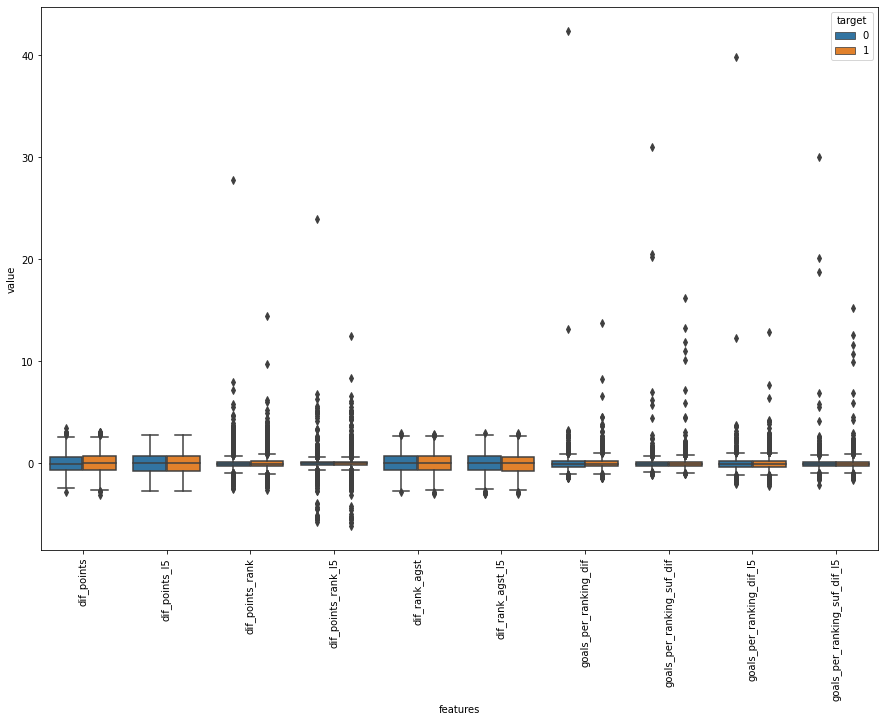

In [278]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="target", data=violin)
plt.xticks(rotation=90)
plt.show()

Great, difference of points (full and last 5 games), difference of points by ranking faced (full and last 5 games) and difference of rank faced (full and last 5 games) are good features. Also, some of the generated features have very similar distributions which will be analyzed using scatterplots.

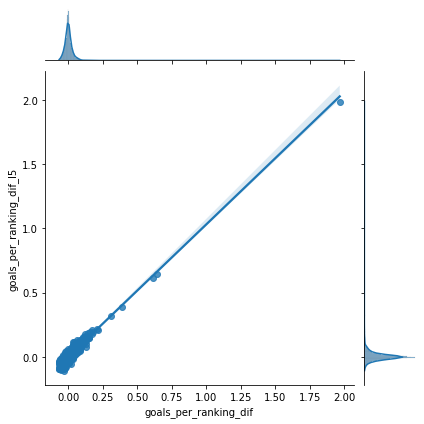

In [279]:
sns.jointplot(data = data_difs, x = 'goals_per_ranking_dif', y = 'goals_per_ranking_dif_l5', kind="reg")
plt.show()

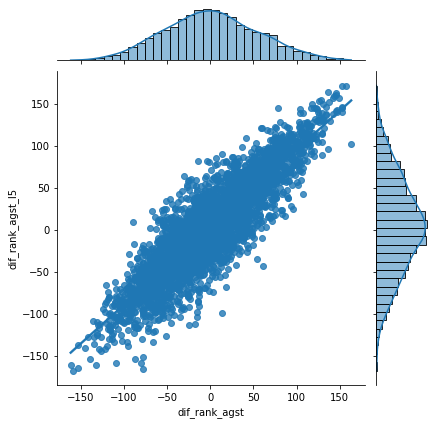

In [280]:
sns.jointplot(data = data_difs, x = 'dif_rank_agst', y = 'dif_rank_agst_l5', kind="reg")
plt.show()

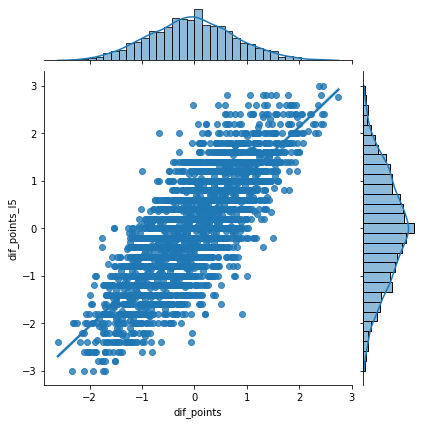

In [281]:
sns.jointplot(data = data_difs, x = 'dif_points', y = 'dif_points_l5', kind="reg")
plt.show()

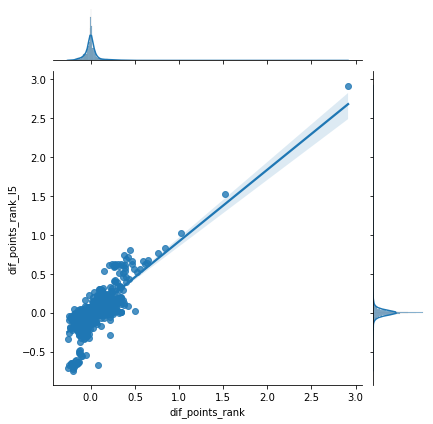

In [282]:
sns.jointplot(data = data_difs, x = 'dif_points_rank', y = 'dif_points_rank_l5', kind="reg")
plt.show()

For the differences of rank faced, game points by rank faced and mean game points by rank faced, the two versions (full and 5 games) are not so similar. So, we will use both.

Based on that, final features are:

rank_dif,
goals_dif,
goals_dif_l5,
goals_suf_dif,
goals_suf_dif_l5,
dif_rank_agst,
dif_rank_agst_l5,
goals_per_ranking_dif,
dif_points_rank,
dif_points_rank_l5,
is_friendly

In [283]:
def create_db(df):
    columns = ["home_team", "away_team", "target", "rank_dif", "home_goals_mean", "home_rank_mean", "away_goals_mean", "away_rank_mean", "home_rank_mean_l5", "away_rank_mean_l5", "home_goals_suf_mean", "away_goals_suf_mean", "home_goals_mean_l5", "away_goals_mean_l5", "home_goals_suf_mean_l5", "away_goals_suf_mean_l5", "home_game_points_rank_mean", "home_game_points_rank_mean_l5", "away_game_points_rank_mean", "away_game_points_rank_mean_l5","is_friendly_0", "is_friendly_1"]
    
    base = df.loc[:, columns]
    base.loc[:, "goals_dif"] = base["home_goals_mean"] - base["away_goals_mean"]
    base.loc[:, "goals_dif_l5"] = base["home_goals_mean_l5"] - base["away_goals_mean_l5"]
    base.loc[:, "goals_suf_dif"] = base["home_goals_suf_mean"] - base["away_goals_suf_mean"]
    base.loc[:, "goals_suf_dif_l5"] = base["home_goals_suf_mean_l5"] - base["away_goals_suf_mean_l5"]
    base.loc[:, "goals_per_ranking_dif"] = (base["home_goals_mean"] / base["home_rank_mean"]) - (base["away_goals_mean"] / base["away_rank_mean"])
    base.loc[:, "dif_rank_agst"] = base["home_rank_mean"] - base["away_rank_mean"]
    base.loc[:, "dif_rank_agst_l5"] = base["home_rank_mean_l5"] - base["away_rank_mean_l5"]
    base.loc[:, "dif_points_rank"] = base["home_game_points_rank_mean"] - base["away_game_points_rank_mean"]
    base.loc[:, "dif_points_rank_l5"] = base["home_game_points_rank_mean_l5"] - base["away_game_points_rank_mean_l5"]
    
    model_df = base[["home_team", "away_team", "target", "rank_dif", "goals_dif", "goals_dif_l5", "goals_suf_dif", "goals_suf_dif_l5", "goals_per_ranking_dif", "dif_rank_agst", "dif_rank_agst_l5", "dif_points_rank", "dif_points_rank_l5", "is_friendly_0", "is_friendly_1"]]
    return model_df

model_db = create_db(df)
model_db.head(20)


,home_team,away_team,target,rank_dif,goals_dif,goals_dif_l5,goals_suf_dif,goals_suf_dif_l5,goals_per_ranking_dif,dif_rank_agst,dif_rank_agst_l5,dif_points_rank,dif_points_rank_l5,is_friendly_0,is_friendly_1
15,Equatorial Guinea,Nigeria,1,90.0,-0.666667,-0.6,-0.916667,-1.4,-0.017773,20.041667,3.8,-0.120439,0.007525,1,0
16,Rwanda,Libya,1,27.0,-0.258065,0.0,-1.709677,-1.4,-0.013139,37.387097,52.2,-0.005968,0.000577,1,0
17,Burkina Faso,Cameroon,1,-1.0,-1.818182,-0.8,-0.136364,-1.2,-0.022185,-30.954545,-17.8,-0.026426,-0.001143,1,0
18,Congo,Angola,1,-46.0,-1.576923,-2.4,0.000000,-0.2,-0.029818,63.115385,61.0,-0.037787,-0.038562,1,0
19,Moldova,South Korea,1,107.0,-0.409091,0.2,-0.863636,-0.6,-0.009353,55.318182,81.0,0.001937,-0.000213,0,1
20,Morocco,Namibia,0,-72.0,-0.227273,-0.2,-0.909091,-0.6,-0.006471,2.227273,-11.4,0.027672,0.028747,1,0
21,Zambia,Sudan,1,-52.0,-0.818182,-0.4,0.136364,0.4,-0.015929,90.636364,91.2,-0.040431,-0.026123,1,0
22,United States,Bosnia and Herzegovina,1,-13.0,-1.653846,-1.6,0.692308,0.4,-0.034263,47.730769,50.2,-0.041375,-0.035874,0,1
23,Congo,Libya,1,7.0,0.739130,0.6,-1.391304,-1.6,0.021507,-8.652174,13.0,0.013277,0.037323,1,0
25,Azerbaijan,Moldova,1,-48.0,-1.631579,-0.6,-1.526316,-1.0,-0.028054,65.842105,79.8,-0.013466,-0.006185,0,1


# Model Creation

Now that we have a database ready and with columns with predictive power, we can start our modelling.

Two models will be tested: Random Forest and Gradient Boosting. The selected will be the one with best recall.

In [284]:
X = model_db.iloc[:, 3:]
y = model_db[["target"]]

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1)

In [285]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

gb = gb_cv.best_estimator_
gb

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=5,
                           n_estimators=200, random_state=5)

In [286]:
params_rf = {"max_depth": [20],
                "min_samples_split": [10],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [250],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [10], 'n_estimators': [250]},
             verbose=False)

In [287]:
rf = rf_cv.best_estimator_

In [288]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d")


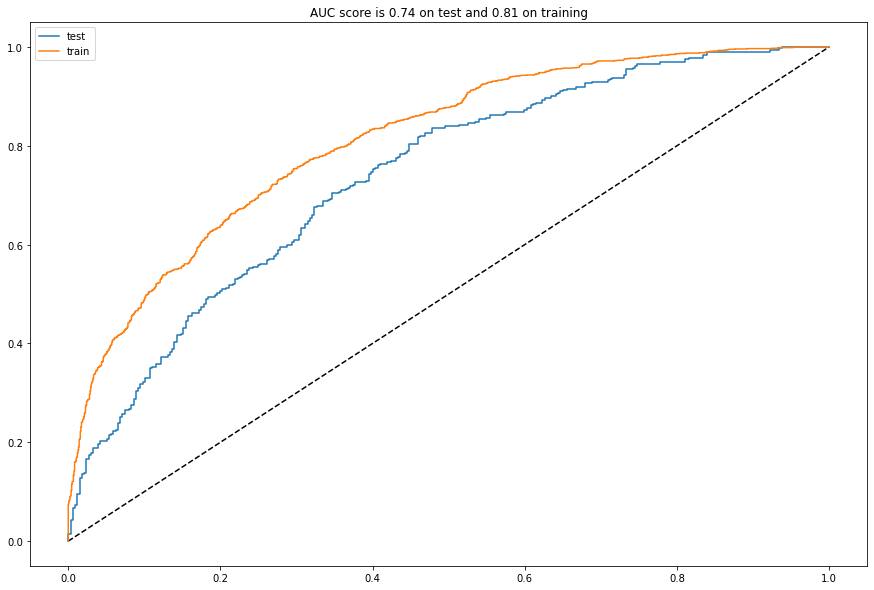

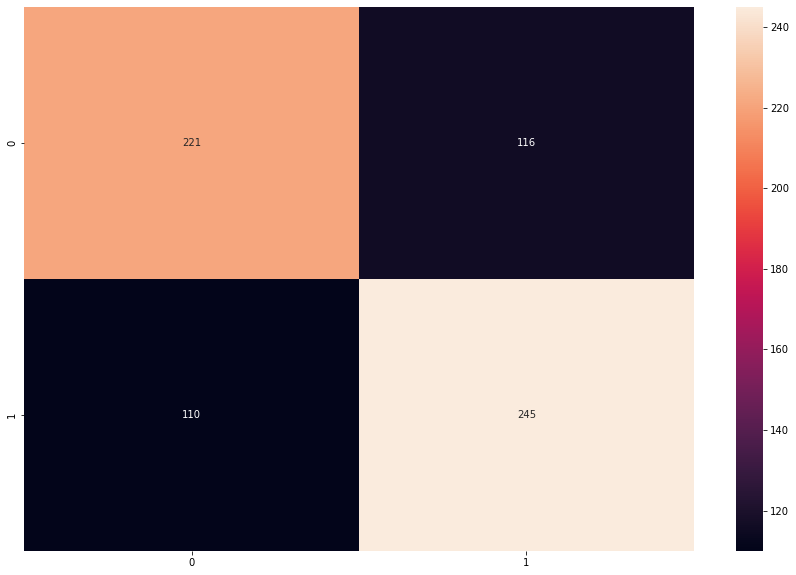

In [289]:
analyze(gb)

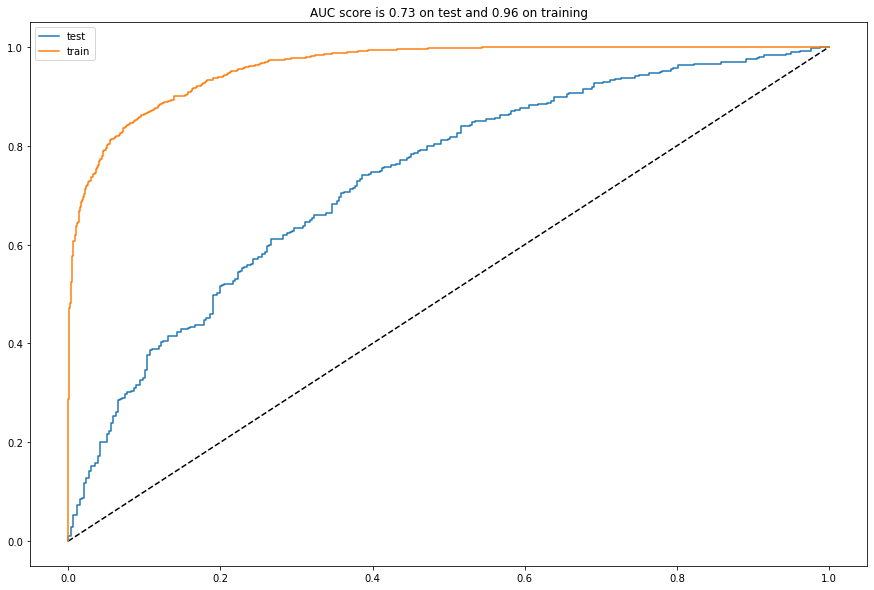

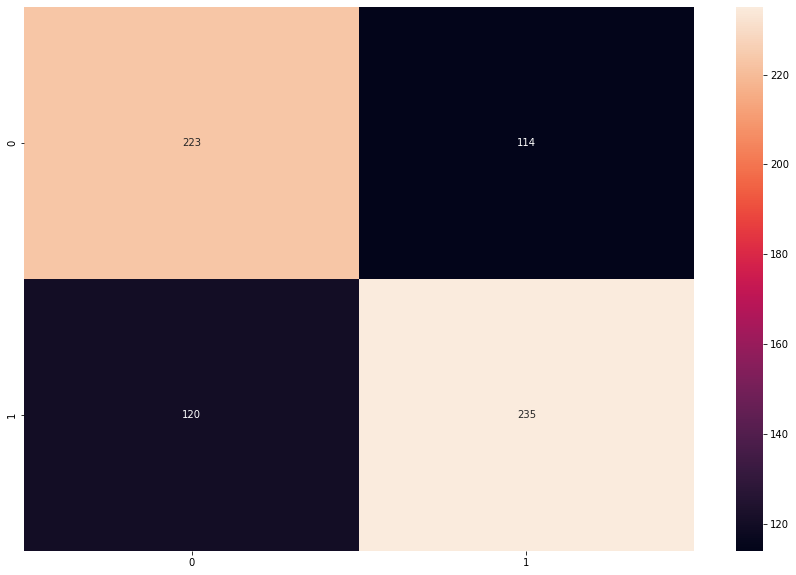

In [290]:
analyze(rf)

The Random Forest model is a little bit better but seems to underfit. So, we will use the Gradient Boosting Model.
But I'm going to try XGBoost once and see the results too.

In [291]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [292]:
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


In [293]:
params_xg = {'max_depth':[3, 18, 1],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' : [0,1],
        'colsample_bytree' : [0.5,1],
        'min_child_weight' : [0, 10, 1],
        'n_estimators': [180],
        'seed': [0]
                }

xg = xgb.XGBClassifier()

xg_cv = GridSearchCV(xg, params_xg, cv = 3, n_jobs = -1, verbose = False)

xg_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [294]:
xg = xg_cv.best_estimator_

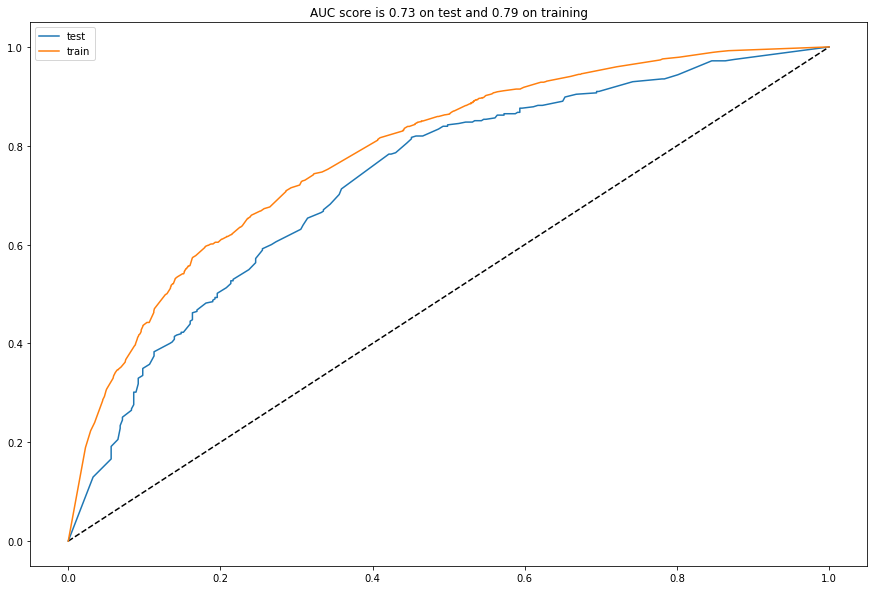

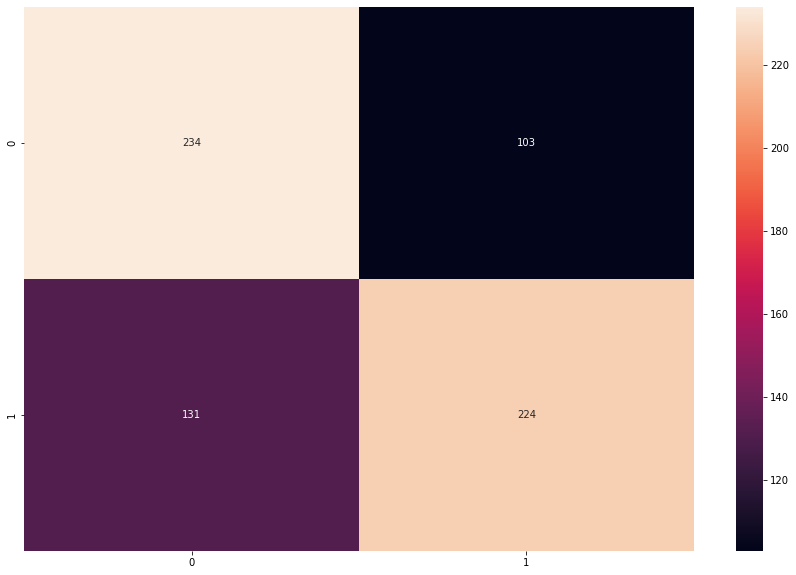

In [295]:
analyze(xg)

- Okay, there isn't that big of a difference so I will use GradientBoostClassifier in the model



# Getting Matches & Groups

- Alright now as I know which algorithm I'll be using I'll go ahead and gather the world cup schedule & fixtures
- One more logic I'll be using is that I'll be taking all stats like ranking, goal_scored_l5,goals_conceded_l5 from the last match. i.e if Portugal last match before WC was agianst Brazil their all stats will be taken upto that match
- I'll be getting the fixtures from wikipidea official page but will be making groups manually(having difficulty scraping them XD)

In [296]:
dfs = pd.read_html(r"https://en.wikipedia.org/wiki/2022_FIFA_World_Cup#Teams")
from collections.abc import Iterable

for i in range(len(dfs)):
    df = dfs[i]
    cols = list(df.columns.values)
    
    if isinstance(cols[0], Iterable):
        if any("Tie-breaking criteria" in c for c in cols):
            start_pos = i+1

        if any("Match 46" in c for c in cols):
            end_pos = i+1

In [304]:
matches = []
groups = ["A","B","C","D","E","F","G","H"]
group_count = 0
table = {'A': [['Qatar', 0, []],  ['Ecuador', 0, []],  ['Senegal', 0, []],  ['Netherlands', 0, []]], 
          'B': [['England', 0, []],  ['Iran', 0, []],  ['United States', 0, []],  ['Wales', 0, []]],
          'C': [['Argentina', 0, []],  ['Saudi Arabia', 0, []],  ['Mexico', 0, []],  ['Poland', 0, []]],
          'D': [['France', 0, []],  ['Australia', 0, []],  ['Denmark', 0, []],  ['Tunisia', 0, []]],
          'E': [['Spain', 0, []],  ['Costa Rica', 0, []],  ['Germany', 0, []],  ['Japan', 0, []]], 
          'F': [['Belgium', 0, []],  ['Canada', 0, []],  ['Morocco', 0, []],  ['Croatia', 0, []]], 
          'G': [['Brazil', 0, []],  ['Serbia', 0, []],  ['Switzerland', 0, []], ['Cameroon', 0, []]], 
          'H': [['Portugal', 0, []],  ['Ghana', 0, []],  ['Uruguay', 0, []],  ['South Korea', 0, []]]}

for i in range(10, 65, 1):
    if len(dfs[i].columns) == 3:
        team_1 = dfs[i].columns.values[0]
        team_2 = dfs[i].columns.values[-1]

        matches.append((groups[group_count], team_1, team_2))
    else:
        group_count+=1
        table[groups[group_count]] = [[a, 0, []] for a in list(dfs[i].iloc[:, 1].values)]


In [305]:
# All Group stage fixtures are here
matches

[('A', 'Qatar', 'Ecuador'),
 ('A', 'Senegal', 'Netherlands'),
 ('A', 'Qatar', 'Senegal'),
 ('A', 'Netherlands', 'Ecuador'),
 ('A', 'Ecuador', 'Senegal'),
 ('A', 'Netherlands', 'Qatar'),
 ('B', 'England', 'Iran'),
 ('B', 'United States', 'Wales'),
 ('B', 'Wales', 'Iran'),
 ('B', 'England', 'United States'),
 ('B', 'Wales', 'England'),
 ('B', 'Iran', 'United States'),
 ('C', 'Argentina', 'Saudi Arabia'),
 ('C', 'Mexico', 'Poland'),
 ('C', 'Poland', 'Saudi Arabia'),
 ('C', 'Argentina', 'Mexico'),
 ('C', 'Poland', 'Argentina'),
 ('C', 'Saudi Arabia', 'Mexico'),
 ('D', 'Denmark', 'Tunisia'),
 ('D', 'France', 'Australia'),
 ('D', 'Tunisia', 'Australia'),
 ('D', 'France', 'Denmark'),
 ('D', 'Australia', 'Denmark'),
 ('D', 'Tunisia', 'France'),
 ('E', 'Germany', 'Japan'),
 ('E', 'Spain', 'Costa Rica'),
 ('E', 'Japan', 'Costa Rica'),
 ('E', 'Spain', 'Germany'),
 ('E', 'Japan', 'Spain'),
 ('E', 'Costa Rica', 'Germany'),
 ('F', 'Morocco', 'Croatia'),
 ('F', 'Belgium', 'Canada'),
 ('F', 'Belgium',

- Okay now that I've the whole fixture for the group stages, I'll move with starting the simulation. 
- But before that, initially getting the required stats and then will be comparing features of both teams

# SIMULATOR


In [306]:
def find_stats(team_1):
#team_1 = "Qatar"
    past_games = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date")
    last5 = team_stats_raw[(team_stats_raw["team"] == team_1)].sort_values("date").tail(5)

    team_1_rank = past_games["rank"].values[-1]
    team_1_goals = past_games.score.mean()
    team_1_goals_l5 = last5.score.mean()
    team_1_goals_suf = past_games.suf_score.mean()
    team_1_goals_suf_l5 = last5.suf_score.mean()
    team_1_rank_suf = past_games.rank_suf.mean()
    team_1_rank_suf_l5 = last5.rank_suf.mean()
    team_1_gp_rank = past_games.points_by_rank.mean()
    team_1_gp_rank_l5 = last5.points_by_rank.mean()

    return [team_1_rank, team_1_goals, team_1_goals_l5, team_1_goals_suf, team_1_goals_suf_l5, team_1_rank_suf, team_1_rank_suf_l5, team_1_gp_rank, team_1_gp_rank_l5]

In [307]:
def find_features(team_1, team_2):
    rank_dif = team_1[0] - team_2[0]
    goals_dif = team_1[1] - team_2[1]
    goals_dif_l5 = team_1[2] - team_2[2]
    goals_suf_dif = team_1[3] - team_2[3]
    goals_suf_dif_l5 = team_1[4] - team_2[4]
    goals_per_ranking_dif = (team_1[1]/team_1[5]) - (team_2[1]/team_2[5])
    dif_rank_agst = team_1[5] - team_2[5]
    dif_rank_agst_l5 = team_1[6] - team_2[6]
    dif_gp_rank = team_1[7] - team_2[7]
    dif_gp_rank_l5 = team_1[8] - team_2[8]
    
    return [rank_dif, goals_dif, goals_dif_l5, goals_suf_dif, goals_suf_dif_l5, goals_per_ranking_dif, dif_rank_agst, dif_rank_agst_l5, dif_gp_rank, dif_gp_rank_l5, 1, 0]

In [308]:
from operator import itemgetter
advanced_group = []
last_group = ""

for k in table.keys():
    for t in table[k]:
        t[1] = 0
        t[2] = []
        
for teams in matches:
    draw = False
    team_1 = find_stats(teams[1])
    team_2 = find_stats(teams[2])

    

    features_g1 = find_features(team_1, team_2)
    features_g2 = find_features(team_2, team_1)

    probs_g1 = gb.predict_proba([features_g1])
    probs_g2 = gb.predict_proba([features_g2])
    
    team_1_prob_g1 = probs_g1[0][0]
    team_1_prob_g2 = probs_g2[0][1]
    team_2_prob_g1 = probs_g1[0][1]
    team_2_prob_g2 = probs_g2[0][0]

    team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
    team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
    
    if ((team_1_prob_g1 > team_2_prob_g1) & (team_2_prob_g2 > team_1_prob_g2)) | ((team_1_prob_g1 < team_2_prob_g1) & (team_2_prob_g2 < team_1_prob_g2)):
        draw=True
        for i in table[teams[0]]:
            if i[0] == teams[1] or i[0] == teams[2]:
                i[1] += 1
                
    elif team_1_prob > team_2_prob:
        winner = teams[1]
        winner_proba = team_1_prob
        for i in table[teams[0]]:
            if i[0] == teams[1]:
                i[1] += 3
                
    elif team_2_prob > team_1_prob:  
        winner = teams[2]
        winner_proba = team_2_prob
        for i in table[teams[0]]:
            if i[0] == teams[2]:
                i[1] += 3
    
    for i in table[teams[0]]: #adding criterio de desempate (probs por jogo)
            if i[0] == teams[1]:
                i[2].append(team_1_prob)
            if i[0] == teams[2]:
                i[2].append(team_2_prob)
                
    

    if last_group != teams[0]:
        if last_group != "":
            print("\n")
            print("Group %s advanced: "%(last_group))
            
            for i in table[last_group]: #adding crieterio de desempate
                i[2] = np.mean(i[2])
            
            final_points = table[last_group]
            final_table = sorted(final_points,key = itemgetter(1,2), reverse = True)
            advanced_group.append([final_table[0][0], final_table[1][0]])
            for i in final_table:
                print("%s -------- %d"%(i[0], i[1]))
        print("\n")
        print("-"*10+" Starting Analysis for Group %s "%(teams[0])+"-"*10)
        
        
    if draw == False:
        print("Group %s - %s vs. %s: Winner %s with %.2f probability"%(teams[0], teams[1], teams[2], winner, winner_proba))
    else:
        print("Group %s - %s vs. %s: Draw"%(teams[0], teams[1], teams[2]))
    last_group =  teams[0]

print("\n")
print("Group %s advanced: "%(last_group))

for i in table[last_group]: #adding crieterio de desempate
    i[2] = np.mean(i[2])
            
final_points = table[last_group]
final_table = sorted(final_points,key=itemgetter(1,2),reverse = True)
advanced_group.append([final_table[0][0], final_table[1][0]])
for i in final_table:
    print("%s -------- %d"%(i[0], i[1]))




---------- Starting Analysis for Group A ----------
Group A - Qatar vs. Ecuador: Draw
Group A - Senegal vs. Netherlands: Draw
Group A - Qatar vs. Senegal: Winner Senegal with 0.61 probability
Group A - Netherlands vs. Ecuador: Winner Netherlands with 0.66 probability
Group A - Ecuador vs. Senegal: Winner Senegal with 0.62 probability
Group A - Netherlands vs. Qatar: Winner Netherlands with 0.66 probability


Group A advanced: 
Netherlands -------- 7
Senegal -------- 7
Ecuador -------- 1
Qatar -------- 1


---------- Starting Analysis for Group B ----------
Group B - England vs. Iran: Draw
Group B - United States vs. Wales: Draw
Group B - Wales vs. Iran: Draw
Group B - England vs. United States: Draw
Group B - Wales vs. England: Draw
Group B - Iran vs. United States: Draw


Group B advanced: 
England -------- 3
United States -------- 3
Wales -------- 3
Iran -------- 3


---------- Starting Analysis for Group C ----------
Group C - Argentina vs. Saudi Arabia: Winner Argentina with 0.65

- Not alot of crazy predictions. I think the teams who're predicted to advance, advanced out of group stage.
- Group B never saw a winner and that's still baffling as team like England is way better than other teams in the group.

In [310]:
advanced = advanced_group
playoffs = {"Round of 16": [], "Quarter-Final": [], "Semi-Final": [], "Final": []}
for p in playoffs.keys():
    playoffs[p] = []

actual_round = ""
next_rounds = []

for p in playoffs.keys():
    if p == "Round of 16":
        control = []
        for a in range(0, len(advanced*2), 1):
            if a < len(advanced):
                if a % 2 == 0:
                    control.append((advanced*2)[a][0])
                else:
                    control.append((advanced*2)[a][1])
            else:
                if a % 2 == 0:
                    control.append((advanced*2)[a][1])
                else:
                    control.append((advanced*2)[a][0])

        playoffs[p] = [[control[c], control[c+1]] for c in range(0, len(control)-1, 1) if c%2 == 0]
        
        for i in range(0, len(playoffs[p]), 1):
            game = playoffs[p][i]
            
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)

            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        
    else:
        playoffs[p] = [[next_rounds[c], next_rounds[c+1]] for c in range(0, len(next_rounds)-1, 1) if c%2 == 0]
        next_rounds = []
        for i in range(0, len(playoffs[p])):
            game = playoffs[p][i]
            home = game[0]
            away = game[1]
            team_1 = find_stats(home)
            team_2 = find_stats(away)
            
            features_g1 = find_features(team_1, team_2)
            features_g2 = find_features(team_2, team_1)
            
            probs_g1 = gb.predict_proba([features_g1])
            probs_g2 = gb.predict_proba([features_g2])
            
            team_1_prob = (probs_g1[0][0] + probs_g2[0][1])/2
            team_2_prob = (probs_g2[0][0] + probs_g1[0][1])/2
            
            if actual_round != p:
                print("-"*10)
                print("Starting simulation of %s"%(p))
                print("-"*10)
                print("\n")
            
            if team_1_prob < team_2_prob:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, away, team_2_prob))
                next_rounds.append(away)
            else:
                print("%s vs. %s: %s advances with prob %.2f"%(home, away, home, team_1_prob))
                next_rounds.append(home)
            game.append([team_1_prob, team_2_prob])
            playoffs[p][i] = game
            actual_round = p
        

----------
Starting simulation of Round of 16
----------


Netherlands vs. United States: Netherlands advances with prob 0.51
Argentina vs. Denmark: Argentina advances with prob 0.53
Spain vs. Croatia: Spain advances with prob 0.52
Brazil vs. Portugal: Brazil advances with prob 0.52
Senegal vs. England: England advances with prob 0.56
Mexico vs. France: France advances with prob 0.52
Germany vs. Belgium: Belgium advances with prob 0.54
Switzerland vs. Uruguay: Uruguay advances with prob 0.54
----------
Starting simulation of Quarter-Final
----------


Netherlands vs. Argentina: Argentina advances with prob 0.55
Spain vs. Brazil: Brazil advances with prob 0.50
England vs. France: England advances with prob 0.52
Belgium vs. Uruguay: Belgium advances with prob 0.55
----------
Starting simulation of Semi-Final
----------


Argentina vs. Brazil: Argentina advances with prob 0.51
England vs. Belgium: Belgium advances with prob 0.53
----------
Starting simulation of Final
----------


Argenti

# Result

- Okay, damn I hoped to see Cristiano win this world cup but they went out against Brazil in round of 16. Tough 
- Belgium might be a surprise for some people but they're in a tear since last worldcup after coming short of the finals
- Messi again lost a WC final.

# FINAL THOUGHTS & LEARNINGS

- I really enjoyed working on this project as this is one of the few projects I'll be showcasing on my portfolio after working on multiple short projects and learing each and every time with them.
- I'm sure I'll be making more predictive models in the future with Euros, UEFA cup etc
- At last this really helped & showcased my data preperation, creativity to come up with new features and selection of best algorithm for the model.
- It also helped me with constant researching on the web to look for the answers to my own questions and each steps I stuck on